## Library

In [320]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import  OrdinalEncoder

### Mengakses dataset, melihat tipe data,melihat jumlah data kosong, melihat 5 data pertama

In [321]:
data=pan.read_csv("dataset2.csv")
print('Tipe Data')
print(data.dtypes)
print('\nData Kosong')
print(data.isna().sum(),'\n')
data.head()

Tipe Data
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Data Kosong
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Menghapus data bernilai NULL

In [322]:
data=data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Melakukan Encoding pada data bernilai object dan Pembuatan Subset

In [323]:
subset_1=data[:].drop('stroke',axis=1)
subset_1[['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']] = OrdinalEncoder().fit_transform(data[['gender', 'ever_married', 'work_type',
                                                                 'Residence_type','smoking_status']])
subset_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0
5,56669,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0.0,13.0,0,0,0.0,4.0,0.0,103.08,18.6,0.0
5106,44873,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0
5107,19723,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0
5108,37544,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0


### subset_1a dimana diambil 2 feature bmi dan rata-rata level glukosa. x sebagai bmi dan y sebagai rata-rata level glukosa

In [324]:
subset_1a=subset_1[['bmi','avg_glucose_level']]
subset_1a=np.array(subset_1a)
x=subset_1a[:,0]
y=subset_1a[:,1]

### Kmeans, menampilkan centroid clusters, CROSS TAB & akurasi saat n_cluster=2

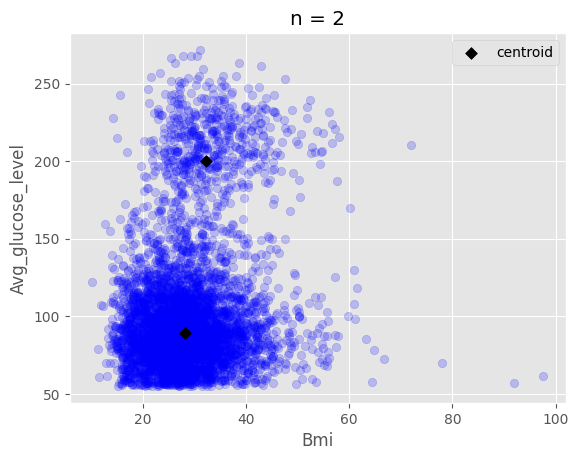

stroke     0    1
labels           
0       4069  131
1        631   78

accuracy: 0.8447749032389489


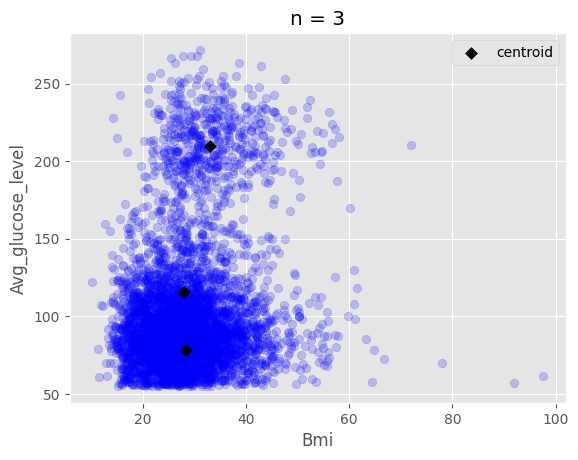

In [325]:
for n in [2,3]:
    model_kmeans=KMeans(n_clusters=n,random_state=0).fit(subset_1a)
    labels=model_kmeans.labels_
    centroid_x=model_kmeans.cluster_centers_[:,0]
    centroid_y=model_kmeans.cluster_centers_[:,1]
    plt.style.use('ggplot')
    plt.scatter(x,y,c='blue',alpha=0.2)
    plt.scatter(centroid_x,centroid_y,label='centroid',c='black',marker='D')
    plt.title(f"n = {n}")
    plt.xlabel('Bmi')
    plt.ylabel('Avg_glucose_level')
    plt.legend()
    plt.show()
    if n==2:
        dfk=pan.DataFrame({'labels':labels,'stroke':data.dropna().stroke})
        CROSS_TAB=pan.crosstab(dfk.labels,dfk.stroke)
        print(CROSS_TAB)
        print('\naccuracy:',(CROSS_TAB[0][0]+CROSS_TAB[1][1])/(CROSS_TAB[0][0]+CROSS_TAB[1][1]+CROSS_TAB[1][0]+CROSS_TAB[0][1]))

### subset_1a dimana diambil 2 feature umur dan rata-rata level glukosa. x sebagai umur dan y sebagai rata-rata level glukosa

In [326]:
subset_1b=subset_1[['age','avg_glucose_level']]
subset_1b=np.array(subset_1b)
x=subset_1b[:,0]
y=subset_1b[:,1]

### Kmeans, menampilkan centroid clusters, CROSS TAB & akurasi saat n_cluster=2

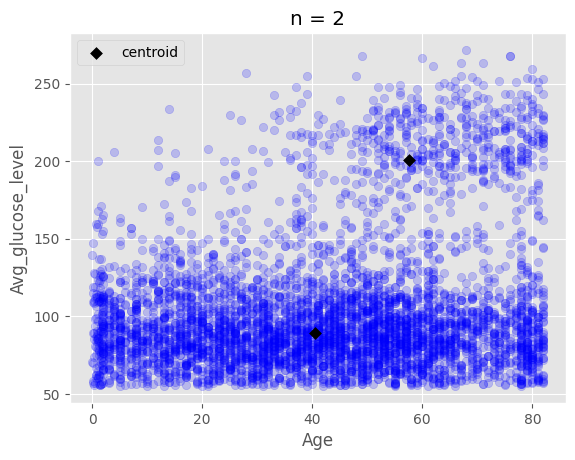

stroke     0    1
labels           
0       4081  131
1        619   78

accuracy: 0.8472193929517213


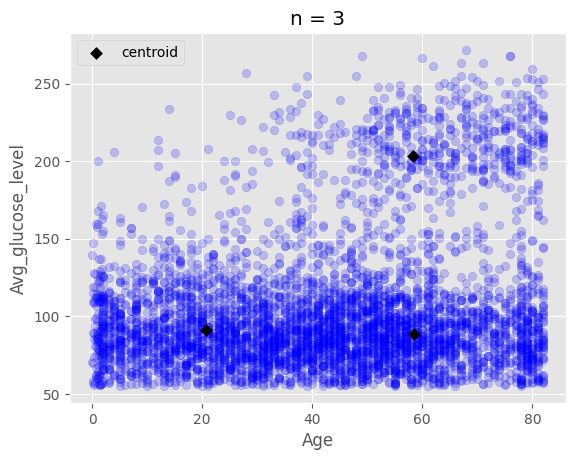

In [327]:
for n in [2,3]:
    model_kmeans=KMeans(n_clusters=n,random_state=0).fit(subset_1b)
    labels=model_kmeans.labels_
    centroid_x=model_kmeans.cluster_centers_[:,0]
    centroid_y=model_kmeans.cluster_centers_[:,1]
    plt.style.use('ggplot')
    plt.scatter(x,y,c='blue',alpha=0.2)
    plt.scatter(centroid_x,centroid_y,label='centroid',c='black',marker='D')
    plt.title(f"n = {n}")
    plt.xlabel('Age')
    plt.ylabel('Avg_glucose_level')
    plt.legend()
    plt.show()
    if n==2:
        dfk=pan.DataFrame({'labels':labels,'stroke':data.dropna().stroke})
        CROSS_TAB=pan.crosstab(dfk.labels,dfk.stroke)
        print(CROSS_TAB)
        print('\naccuracy:',(CROSS_TAB[0][0]+CROSS_TAB[1][1])/(CROSS_TAB[0][0]+CROSS_TAB[1][1]+CROSS_TAB[1][0]+CROSS_TAB[0][1]))

### subset_1a dimana diambil 2 feature bmi dan umur. x sebagai bmi dan y sebagai umur

In [328]:
subset_1c=subset_1[['bmi','age']]
subset_1c=np.array(subset_1c)
x=subset_1c[:,0]
y=subset_1c[:,1]

### Kmeans, menampilkan centroid clusters, CROSS TAB & akurasi saat n_cluster=2

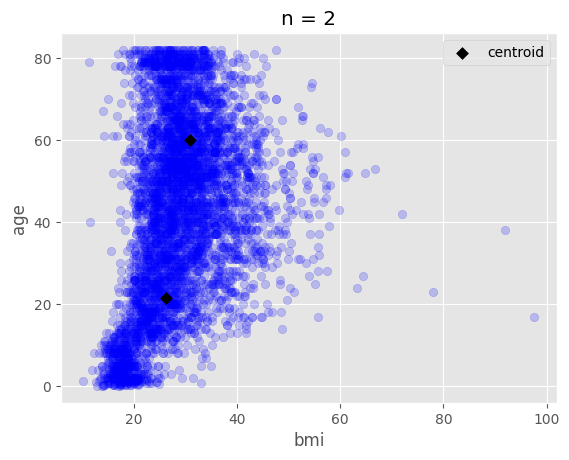

stroke     0    1
labels           
0       2522  203
1       2178    6

accuracy: 0.5149724994907313


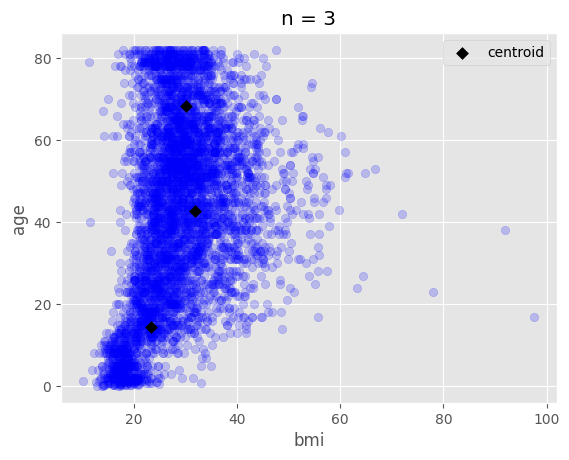

In [329]:
for n in [2,3]:
    model_kmeans=KMeans(n_clusters=n,random_state=0).fit(subset_1c)
    labels=model_kmeans.labels_
    centroid_x=model_kmeans.cluster_centers_[:,0]
    centroid_y=model_kmeans.cluster_centers_[:,1]
    plt.style.use('ggplot')
    plt.scatter(x,y,c='blue',alpha=0.2)
    plt.scatter(centroid_x,centroid_y,label='centroid',c='black',marker='D')
    plt.title(f"n = {n}")
    plt.xlabel('bmi')
    plt.ylabel('age')
    plt.legend()
    plt.show()
    if n==2:
        dfk=pan.DataFrame({'labels':labels,'stroke':data.dropna().stroke})
        CROSS_TAB=pan.crosstab(dfk.labels,dfk.stroke)
        print(CROSS_TAB)
        print('\naccuracy:',(CROSS_TAB[0][0]+CROSS_TAB[1][1])/(CROSS_TAB[0][0]+CROSS_TAB[1][1]+CROSS_TAB[1][0]+CROSS_TAB[0][1]))